In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# making copies of train and test dataset
train = train.copy()
test = test.copy()

# Exploratory Data Analysis

In [6]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [7]:
# combining the train and test dataset

data = pd.concat([train, test])

print(data.shape)

(14204, 12)


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


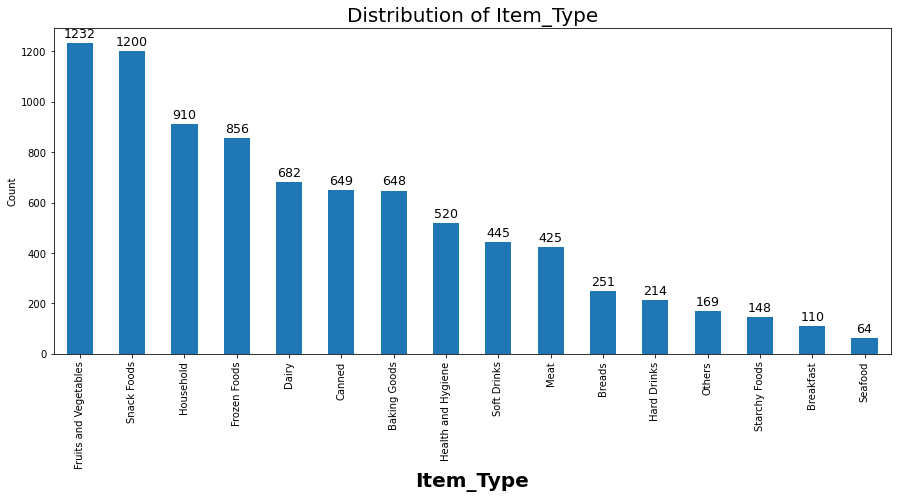

In [10]:
plt.rcParams['figure.figsize'] = (15, 6)

a = train['Item_Type'].value_counts().plot(kind = 'bar')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.title('Distribution of Item_Type', fontsize = 20)
plt.xlabel('Item_Type', fontsize = 20,fontweight="bold")
plt.ylabel('Count')
plt.show()

Note:
Fruits and Vegetables and Snack Foods are the two categories in which most of the items fall whereas Seafood is the least

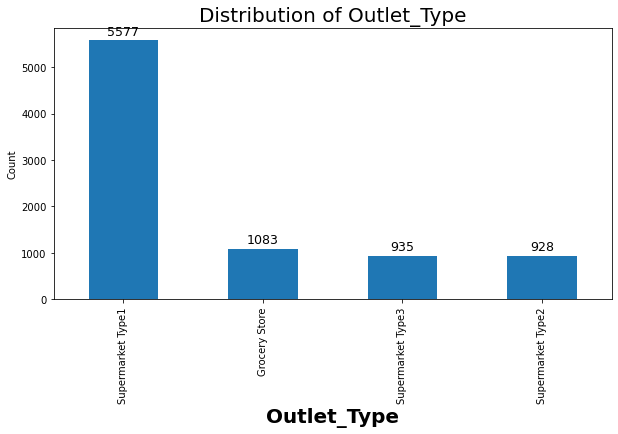

In [11]:
plt.rcParams['figure.figsize'] = (10, 5)

a = train['Outlet_Type'].value_counts().plot(kind = 'bar')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.title('Distribution of Outlet_Type', fontsize = 20)
plt.xlabel('Outlet_Type', fontsize = 20,fontweight="bold")
plt.ylabel('Count')
plt.show()

Note: Most of the outlet type are of supermarket type 1

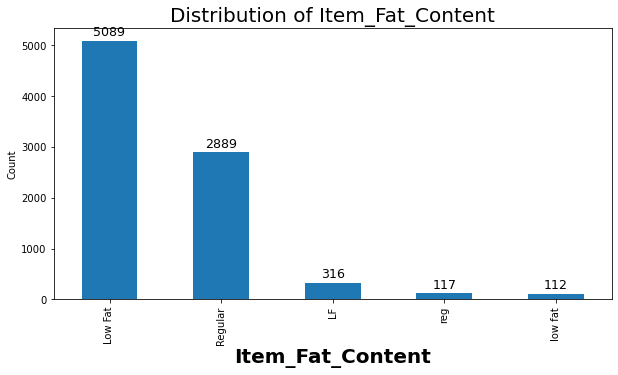

In [12]:
plt.rcParams['figure.figsize'] = (10, 5)

a = train['Item_Fat_Content'].value_counts().plot(kind = 'bar')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.title('Distribution of Item_Fat_Content', fontsize = 20)
plt.xlabel('Item_Fat_Content', fontsize = 20,fontweight="bold")
plt.ylabel('Count')
plt.show()

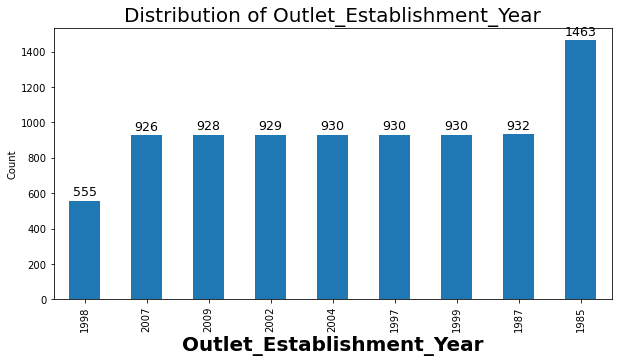

In [13]:
plt.rcParams['figure.figsize'] = (10, 5)

a = train['Outlet_Establishment_Year'].value_counts().sort_values().plot(kind = 'bar')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.title('Distribution of Outlet_Establishment_Year', fontsize = 20)
plt.xlabel('Outlet_Establishment_Year', fontsize = 20,fontweight="bold")
plt.ylabel('Count')
plt.show()

Note: Most outlets were opened in 1985 and least in 1998

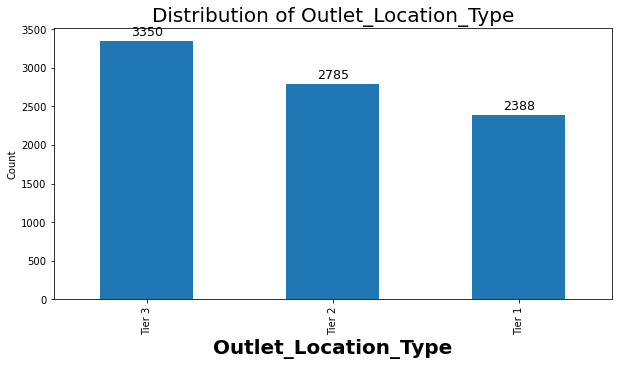

In [14]:
plt.rcParams['figure.figsize'] = (10, 5)

a = train['Outlet_Location_Type'].value_counts().plot(kind = 'bar')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.title('Distribution of Outlet_Location_Type', fontsize = 20)
plt.xlabel('Outlet_Location_Type', fontsize = 20,fontweight="bold")
plt.ylabel('Count')
plt.show()

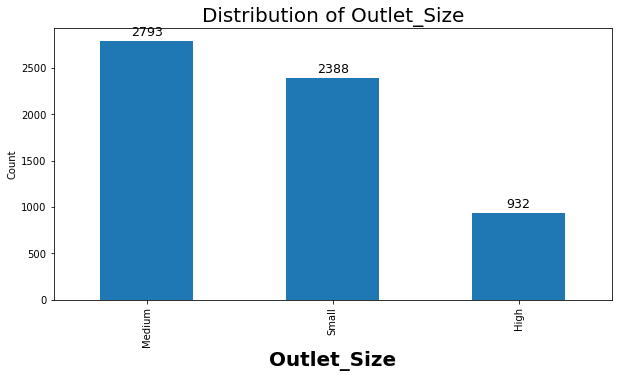

In [15]:
plt.rcParams['figure.figsize'] = (10, 5)

a = train['Outlet_Size'].value_counts().plot(kind = 'bar')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)
plt.title('Distribution of Outlet_Size', fontsize = 20)
plt.xlabel('Outlet_Size', fontsize = 20,fontweight="bold")
plt.ylabel('Count')
plt.show()

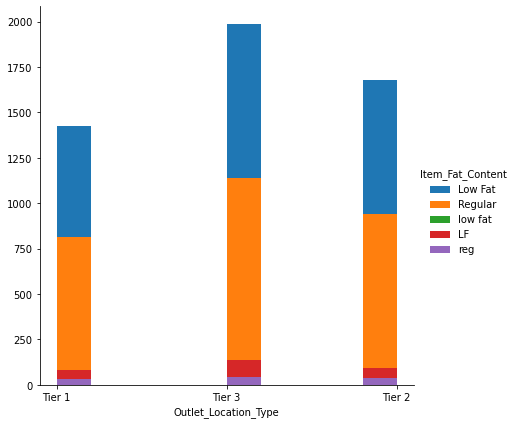

In [16]:
sns.FacetGrid(data=train, hue="Item_Fat_Content", size=6).map(plt.hist,"Outlet_Location_Type").add_legend()


<AxesSubplot:xlabel='Item_Type'>

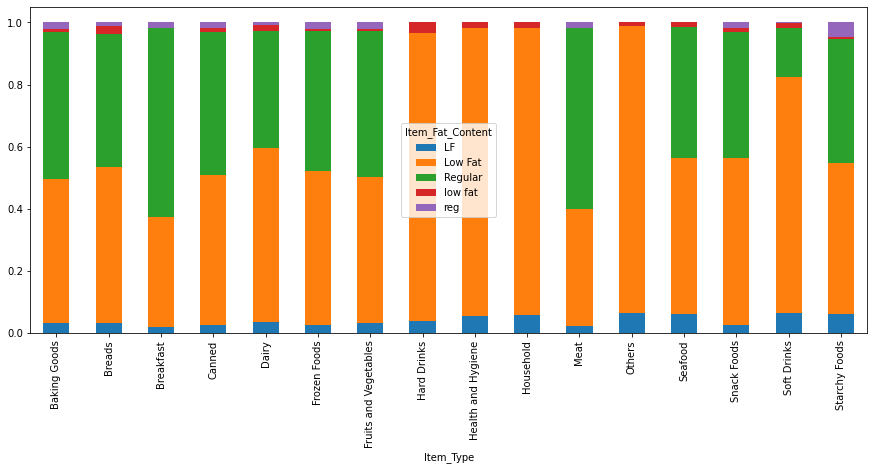

In [17]:
Item_Type = pd.crosstab(train["Item_Type"], train["Item_Fat_Content"])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,6))

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

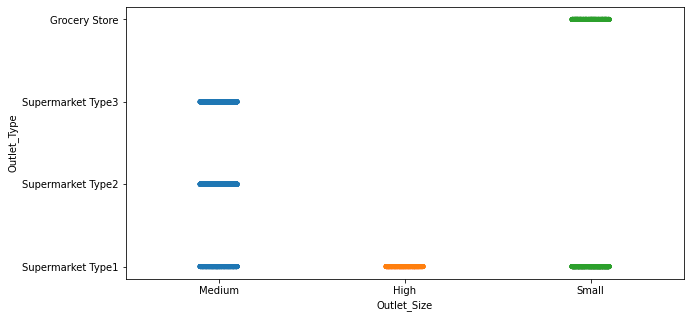

In [18]:
sns.stripplot(train['Outlet_Size'],train['Outlet_Type'])

Note:
Supermarket type 1 are of all sizes  
grocery stores are only small and 
Supermarket type 2, Supermarket type 3 are of medium size only

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

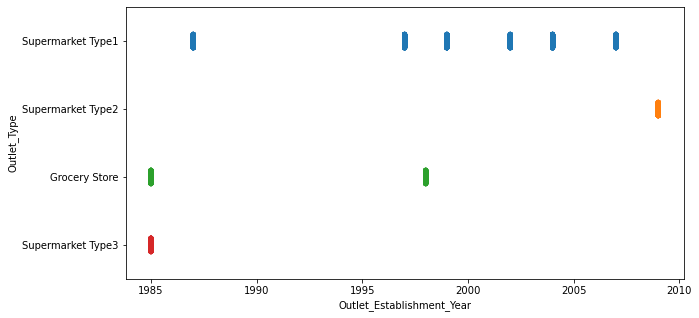

In [19]:
sns.stripplot(train['Outlet_Establishment_Year'],train['Outlet_Type'])

Note:
Supermarket type 2 was build much later while grocery stores and supermarket Type 1 and 3 are the oldest outlet type.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

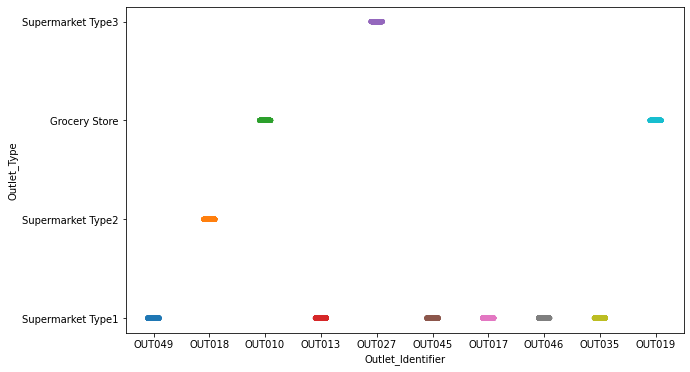

In [20]:
plt.figure(figsize=(10,6))
sns.stripplot(train['Outlet_Identifier'],train['Outlet_Type'])

Note: Most of the outlet identifiers belong to supermarket 1

<AxesSubplot:>

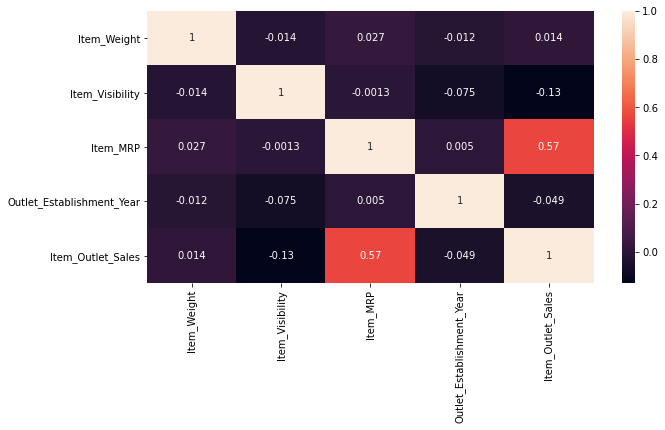

In [21]:
sns.heatmap(train.corr(), annot=True, fmt=".2g")

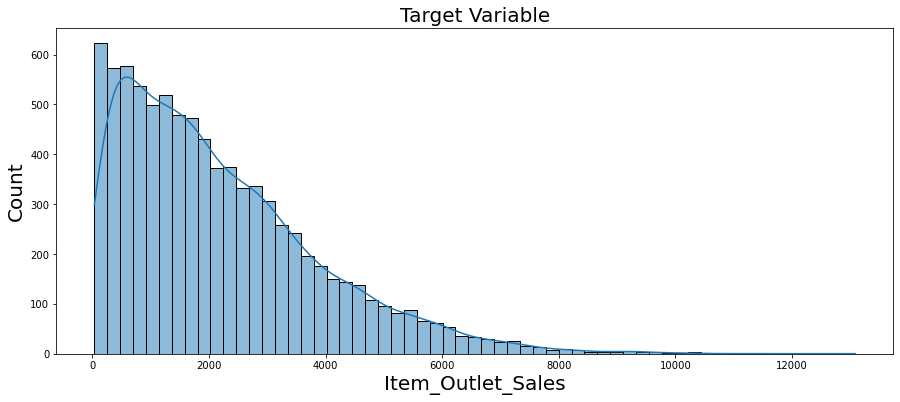

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(x=train['Item_Outlet_Sales'], kde=True)
plt.xlabel('Item_Outlet_Sales', fontsize=20,)
plt.ylabel('Count', fontsize=20)
plt.title('Target Variable', fontsize=20)
plt.show()

In [23]:
train['Item_Type'] = train['Item_Type'].replace('Dairy', 0)
train['Item_Type'] = train['Item_Type'].replace('Soft Drinks', 1)
train['Item_Type'] = train['Item_Type'].replace('Meat', 2)
train['Item_Type'] = train['Item_Type'].replace('Fruits and Vegetables', 3)
train['Item_Type'] = train['Item_Type'].replace('Household', 4)
train['Item_Type'] = train['Item_Type'].replace('Baking Goods', 5)
train['Item_Type'] = train['Item_Type'].replace('Snack Foods', 6)
train['Item_Type'] = train['Item_Type'].replace('Frozen Foods', 7)
train['Item_Type'] = train['Item_Type'].replace('Breakfast', 8)
train['Item_Type'] = train['Item_Type'].replace('Health and Hygiene', 9)
train['Item_Type'] = train['Item_Type'].replace('Hard Drinks', 10)
train['Item_Type'] = train['Item_Type'].replace('Canned', 11)
train['Item_Type'] = train['Item_Type'].replace('Breads', 12)
train['Item_Type'] = train['Item_Type'].replace('Starchy Foods', 13)
train['Item_Type'] = train['Item_Type'].replace('Others', 14)
train['Item_Type'] = train['Item_Type'].replace('Seafood', 15)

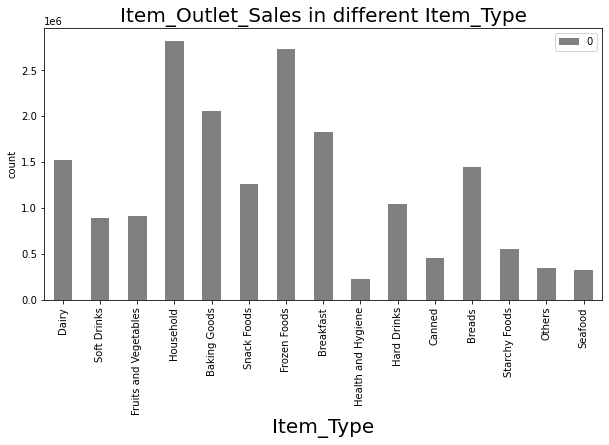

In [24]:
x1 = train[train['Item_Type'] == 0]['Item_Outlet_Sales'].sum()
x2 = train[train['Item_Type'] == 1]['Item_Outlet_Sales'].sum()
x3 = train[train['Item_Type'] == 2]['Item_Outlet_Sales'].sum()
x4 = train[train['Item_Type'] == 3]['Item_Outlet_Sales'].sum()
x5 = train[train['Item_Type'] == 4]['Item_Outlet_Sales'].sum()
x6 = train[train['Item_Type'] == 5]['Item_Outlet_Sales'].sum()
x7 = train[train['Item_Type'] == 6]['Item_Outlet_Sales'].sum()
x8 = train[train['Item_Type'] == 7]['Item_Outlet_Sales'].sum()
x9 = train[train['Item_Type'] == 8]['Item_Outlet_Sales'].sum()
x10 = train[train['Item_Type'] == 9]['Item_Outlet_Sales'].sum()
x11 = train[train['Item_Type'] == 10]['Item_Outlet_Sales'].sum()
x12 = train[train['Item_Type'] == 11]['Item_Outlet_Sales'].sum()
x13 = train[train['Item_Type'] == 12]['Item_Outlet_Sales'].sum()
x14 = train[train['Item_Type'] == 13]['Item_Outlet_Sales'].sum()
x15 = train[train['Item_Type'] == 14]['Item_Outlet_Sales'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15])
x.index = ['Dairy', 'Soft Drinks', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 
           'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
x.plot(kind = 'bar', color = 'grey')

plt.title('Item_Outlet_Sales in different Item_Type', fontsize=20)
plt.xlabel('Item_Type', fontsize=20)
plt.ylabel('count')
plt.show()

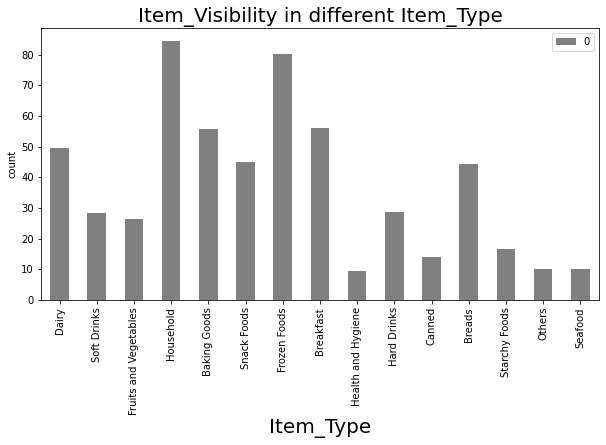

In [25]:
x1 = train[train['Item_Type'] == 0]['Item_Visibility'].sum()
x2 = train[train['Item_Type'] == 1]['Item_Visibility'].sum()
x3 = train[train['Item_Type'] == 2]['Item_Visibility'].sum()
x4 = train[train['Item_Type'] == 3]['Item_Visibility'].sum()
x5 = train[train['Item_Type'] == 4]['Item_Visibility'].sum()
x6 = train[train['Item_Type'] == 5]['Item_Visibility'].sum()
x7 = train[train['Item_Type'] == 6]['Item_Visibility'].sum()
x8 = train[train['Item_Type'] == 7]['Item_Visibility'].sum()
x9 = train[train['Item_Type'] == 8]['Item_Visibility'].sum()
x10 = train[train['Item_Type'] == 9]['Item_Visibility'].sum()
x11 = train[train['Item_Type'] == 10]['Item_Visibility'].sum()
x12 = train[train['Item_Type'] == 11]['Item_Visibility'].sum()
x13 = train[train['Item_Type'] == 12]['Item_Visibility'].sum()
x14 = train[train['Item_Type'] == 13]['Item_Visibility'].sum()
x15 = train[train['Item_Type'] == 14]['Item_Visibility'].sum()

x = pd.DataFrame([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15])
x.index = ['Dairy', 'Soft Drinks', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 
           'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
x.plot(kind = 'bar', color = 'grey')

plt.title('Item_Visibility in different Item_Type', fontsize=20)
plt.xlabel('Item_Type', fontsize=20)
plt.ylabel('count')
plt.show()

Note: Household item type has the highest outlet sales and also has more visibility

In [26]:
train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [27]:
train['Outlet_Type'] = train['Outlet_Type'].replace('Supermarket Type1', 0)
train['Outlet_Type'] = train['Outlet_Type'].replace('Supermarket Type2', 1)
train['Outlet_Type'] = train['Outlet_Type'].replace('Grocery Store', 2)
train['Outlet_Type'] = train['Outlet_Type'].replace('Supermarket Type3', 3)


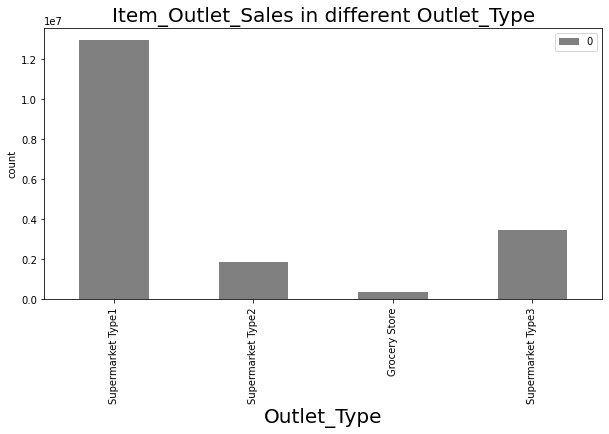

In [28]:
x1 = train[train['Outlet_Type'] == 0]['Item_Outlet_Sales'].sum()
x2 = train[train['Outlet_Type'] == 1]['Item_Outlet_Sales'].sum()
x3 = train[train['Outlet_Type'] == 2]['Item_Outlet_Sales'].sum()
x4 = train[train['Outlet_Type'] == 3]['Item_Outlet_Sales'].sum()


x = pd.DataFrame([x1, x2, x3, x4])
x.index = ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3']
x.plot(kind = 'bar', color = 'grey')

plt.title('Item_Outlet_Sales in different Outlet_Type', fontsize=20)
plt.xlabel('Outlet_Type', fontsize=20)
plt.ylabel('count')
plt.show()

Note: Supermarket 1 has the highest outlet sales as it has more outlet identifiers

In [29]:
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT049', 0)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT018', 1)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT010', 2)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT013', 3)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT027', 4)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT045', 5)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT017', 6)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT046', 7)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT035', 8)
train['Outlet_Identifier'] = train['Outlet_Identifier'].replace('OUT019', 9)

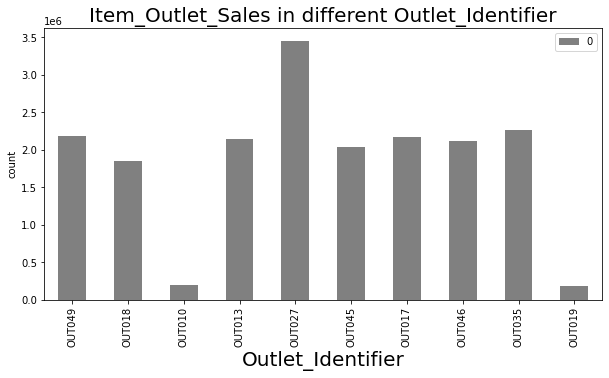

In [30]:
x1 = train[train['Outlet_Identifier'] == 0]['Item_Outlet_Sales'].sum()
x2 = train[train['Outlet_Identifier'] == 1]['Item_Outlet_Sales'].sum()
x3 = train[train['Outlet_Identifier'] == 2]['Item_Outlet_Sales'].sum()
x4 = train[train['Outlet_Identifier'] == 3]['Item_Outlet_Sales'].sum()
x5 = train[train['Outlet_Identifier'] == 4]['Item_Outlet_Sales'].sum()
x6 = train[train['Outlet_Identifier'] == 5]['Item_Outlet_Sales'].sum()
x7 = train[train['Outlet_Identifier'] == 6]['Item_Outlet_Sales'].sum()
x8 = train[train['Outlet_Identifier'] == 7]['Item_Outlet_Sales'].sum()
x9 = train[train['Outlet_Identifier'] == 8]['Item_Outlet_Sales'].sum()
x10 = train[train['Outlet_Identifier'] == 9]['Item_Outlet_Sales'].sum()


x = pd.DataFrame([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])
x.index = ['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']
x.plot(kind = 'bar', color = 'grey')

plt.title('Item_Outlet_Sales in different Outlet_Identifier', fontsize=20)
plt.xlabel('Outlet_Identifier', fontsize=20)
plt.ylabel('count')
plt.show()

Note: Outlet_Identifier (OUT027) has highest outlet sales

Text(0.5, 1.0, 'Item_Outlet_Sales')

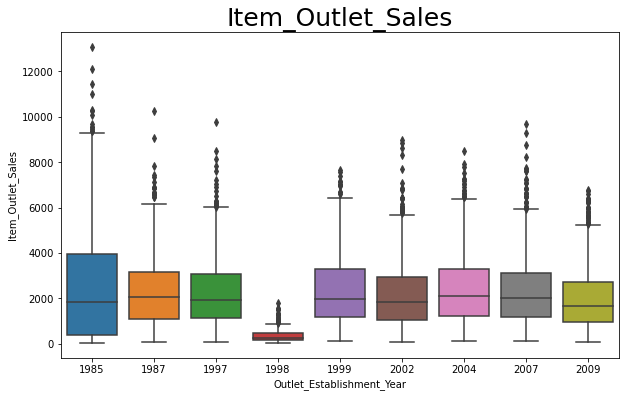

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot('Outlet_Establishment_Year','Item_Outlet_Sales',data=train)
plt.title('Item_Outlet_Sales',size=25)

Note:
The sales reported by the older stores is higher than the relatively newer stores (except for the 1998 established store)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

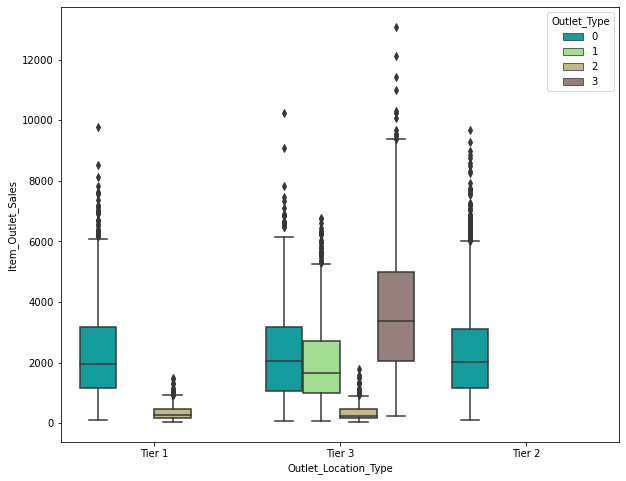

In [32]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=train,palette='terrain')

Note:
As we can see, tier 3 locations seem to be selling better than both tier 2 and tier 1. It is also to be noted that tier 3 has more number of stores in it. 
Hence, the sales are better too.

# Data Preprocessing

In [33]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [34]:
data.replace(0, np.NaN, inplace=True)

In [35]:
data["Item_Weight"] = data["Item_Weight"].fillna(value=data["Item_Weight"].mean())

In [36]:
data["Outlet_Size"] = data["Outlet_Size"].fillna(value=data["Outlet_Size"].mode()[0])

In [37]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [38]:
data["Item_Visibility"] = data["Item_Visibility"].fillna(value=data["Item_Visibility"].mean())

In [39]:
data["Item_Outlet_Sales"] = data["Item_Outlet_Sales"].fillna(value=data["Item_Outlet_Sales"].mode()[0])

In [40]:
print("total number of missing value in data : {}\n" .format(data.isnull().values.sum()))

total number of missing value in data : 0



In [41]:
# combining reg, Regular and Low Fat, low fat and, LF


data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low_Fat', 'reg': 'Regular', 'low fat': 'Low_Fat', "Low Fat" : "Low_Fat"})
data['Item_Fat_Content'].value_counts()

Low_Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [42]:
# Getting the first two characters of ID to separate them into different categories

data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

Unique values in Item_Identifier = ['Food' 'Drinks' 'Non_Consumable']
Unique values in Item_Fat_Content = ['Low_Fat' 'Regular']
Unique values in Item_Type = ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values in Outlet_Identifier = ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Unique values in Outlet_Size = ['Medium' 'High' 'Small']
Unique values in Outlet_Location_Type = ['Tier 1' 'Tier 3' 'Tier 2']
Unique values in Outlet_Type = ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


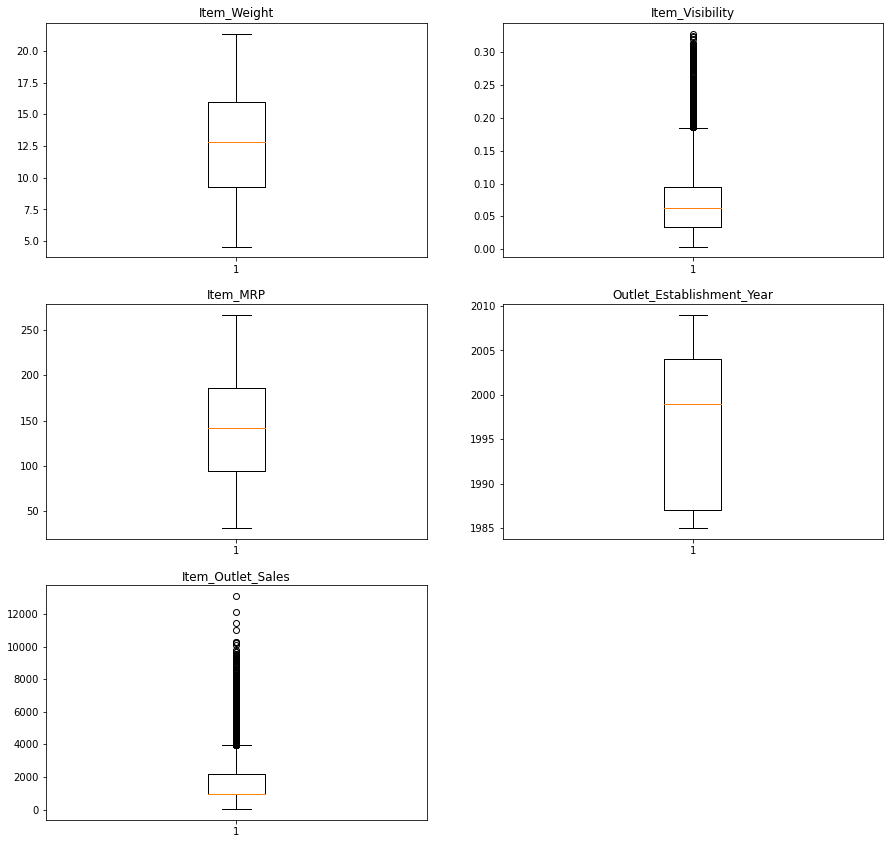

In [43]:
# checking for outliers
plt.figure(figsize = (15,25))
count = 1
for col in data:
    if(data[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,data[col].unique()))
    else:
        plt.subplot(5,2,count)
        plt.boxplot(data[col])
        plt.title(col)
        count +=1
        
plt.show()

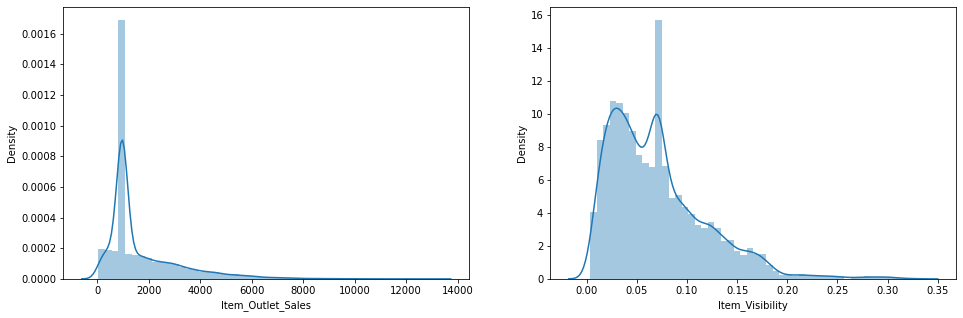

In [44]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['Item_Outlet_Sales'])

plt.subplot(1,2,2)
sns.distplot(data['Item_Visibility'])

plt.show()

In [45]:
# Finding the boundary values
print("Highest allowed",data['Item_Outlet_Sales'].mean() + 3*data['Item_Outlet_Sales'].std())
print("Lowest allowed",data['Item_Outlet_Sales'].mean() - 3*data['Item_Outlet_Sales'].std())

Highest allowed 6045.987721266303
Lowest allowed -2661.3361410914367


In [46]:
# Finding the boundary values
print("Highest allowed",data['Item_Visibility'].mean() + 3*data['Item_Visibility'].std())
print("Lowest allowed",data['Item_Visibility'].mean() - 3*data['Item_Visibility'].std())

Highest allowed 0.21607469736857773
Lowest allowed -0.07546782484760325


In [47]:
data[(data['Item_Outlet_Sales'] > 6045.98) | (data['Item_Outlet_Sales'] < -2661.33)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,Food,21.350000,Low_Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
55,Food,7.905000,Low_Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Medium,Tier 3,Supermarket Type2,6258.5200
130,Food,12.792854,Low_Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,Non_Consumable,12.792854,Low_Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,Food,18.600000,Low_Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
...,...,...,...,...,...,...,...,...,...,...,...,...
8329,Non_Consumable,12.792854,Low_Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,Non_Consumable,10.000000,Low_Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,Food,20.350000,Low_Fat,0.089975,Dairy,261.6594,OUT017,2007,Medium,Tier 2,Supermarket Type1,7588.1226
8485,Drinks,12.792854,Low_Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490


In [48]:
data[(data['Item_Visibility'] > 0.2160) | (data['Item_Visibility'] < -0.0754)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,Food,12.792854,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
83,Non_Consumable,12.792854,Low_Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,Drinks,12.792854,Low_Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,Food,17.700000,Low_Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
434,Food,12.792854,Regular,0.264125,Meat,155.7314,OUT019,1985,Small,Tier 1,Grocery Store,155.1314
...,...,...,...,...,...,...,...,...,...,...,...,...
5469,Food,6.175000,Regular,0.299739,Meat,96.1752,OUT010,1998,Medium,Tier 3,Grocery Store,958.7520
5482,Food,12.792854,Regular,0.240512,Meat,181.9608,OUT019,1985,Small,Tier 1,Grocery Store,958.7520
5514,Drinks,14.600000,Low_Fat,0.252019,Soft Drinks,50.3692,OUT010,1998,Medium,Tier 3,Grocery Store,958.7520
5571,Food,13.800000,Low_Fat,0.236595,Dairy,265.0884,OUT010,1998,Medium,Tier 3,Grocery Store,958.7520


In [49]:
# Trimming

new_data = data[(data['Item_Outlet_Sales'] < 6045.98) & (data['Item_Outlet_Sales'] > -2661.33) & (data["Item_Visibility"] < 0.2160 ) 
                & (data["Item_Visibility"] > -0.0754 )]
new_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low_Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,17.50,Low_Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,19.20,Regular,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Non_Consumable,8.93,Low_Fat,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Food,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,958.7520
5677,Food,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,958.7520
5678,Non_Consumable,10.00,Low_Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,958.7520
5679,Food,15.30,Regular,0.070303,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,958.7520


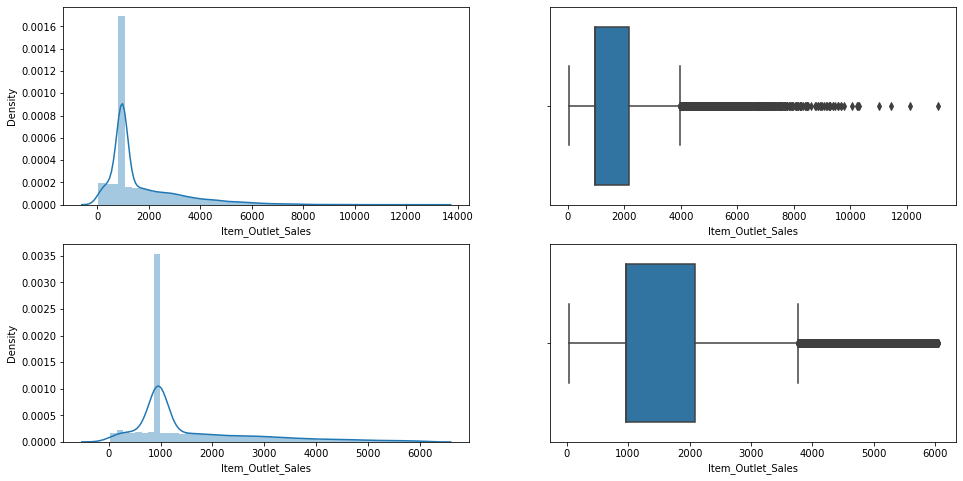

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Item_Outlet_Sales'])

plt.subplot(2,2,2)
sns.boxplot(data['Item_Outlet_Sales'])

plt.subplot(2,2,3)
sns.distplot(new_data['Item_Outlet_Sales'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Item_Outlet_Sales'])

plt.show()

<AxesSubplot:xlabel='Item_Visibility'>

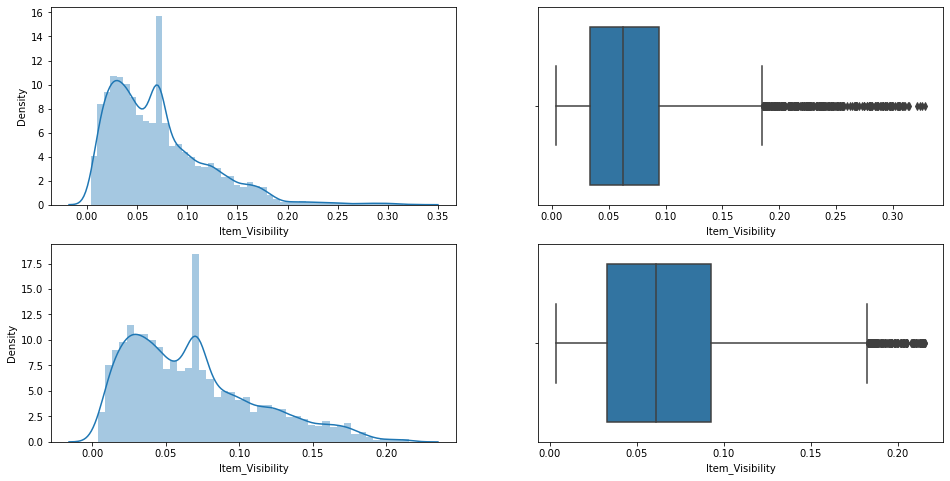

In [51]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Item_Visibility'])

plt.subplot(2,2,2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(2,2,3)
sns.distplot(new_data['Item_Visibility'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Item_Visibility'])

In [52]:
data = data.drop("Item_Identifier", axis=1)

In [53]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,0,1096,4,7567,9,4,1,0,1,2540
1,57,1,1435,14,632,3,8,1,2,2,422
2,376,0,1171,10,3897,9,4,1,0,1,1639
3,393,1,7726,6,5626,0,3,1,2,0,670
4,265,0,7726,9,848,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...
5676,298,1,717,13,3881,8,2,2,0,1,835
5677,180,1,11820,15,5069,3,8,1,2,2,835
5678,293,0,8009,8,3196,7,5,1,1,1,835
5679,354,1,7726,3,6626,2,7,1,1,1,835


In [54]:
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

(14204, 43)


In [55]:
# splitting the data into dependent and independent variables

x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

print(x.shape)
print(y.shape)

(14204, 42)
(14204,)


In [56]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.070303,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.070303,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,0.013496,141.3154,1997,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,7.60,0.142991,169.1448,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,10.00,0.073529,118.7440,2002,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5679,15.30,0.070303,214.6218,2007,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [57]:
X = x.iloc[:8523,:]
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.070303,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.070303,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,0,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [58]:
y = data.iloc[:8523,4:5]
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [59]:
test.shape

(5681, 11)

In [60]:
data_test = x.iloc[8523:,:]

In [61]:
data_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.792854,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,7.600000,0.142991,169.1448,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,10.000000,0.073529,118.7440,2002,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5679,15.300000,0.070303,214.6218,2007,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
std=StandardScaler()

In [64]:
x_std=std.fit_transform(X)

In [65]:
data_test_std=std.transform(data_test)

# Linear Regression

In [66]:
#creating linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [67]:
#fitting the training data
model.fit(x_std,y)

LinearRegression()

In [68]:
#Predictions
y_pred = model.predict(data_test_std)
y_pred

array([[1820.91919995],
       [1517.41919995],
       [1897.41919995],
       ...,
       [1838.41919995],
       [3574.41919995],
       [1300.41919995]])

# Lasso

In [69]:
from sklearn.linear_model import Lasso

In [70]:
#creating Lasso Regression model and fitting the training data
model = Lasso(alpha = 0.1,normalize=True)
model.fit(x_std,y)

Lasso(alpha=0.1, normalize=True)

In [71]:
#prediction
y_pred = model.predict(data_test_std)
y_pred

array([1812.8366604 , 1528.64204747, 1915.14909255, ..., 1863.10325112,
       3491.9945464 , 1292.86748068])

# Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(X,y)


RandomForestRegressor(random_state=0)

In [73]:
y_pred = model.predict(data_test)
y_pred

array([1736.253266, 1387.240906,  513.737938, ..., 1769.643136,
       4050.567408, 1577.619758])

# As we predicted on Test Data csv, we are not able to plot accuracy score as we don't have Ground Truth, 
# so we are going to use only Train.csv and gonna split it into train and test

In [74]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.070303,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,0.070303,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,0,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [75]:
x_std

array([[-0.83922588, -1.11689709,  1.74745381, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.63904672, -1.05059122, -1.48902325, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.10116786, -1.10226932,  0.01004021, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53160248, -0.72412102, -0.89720755, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33378966,  1.53403964, -0.60797692, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.46225773, -0.52521851, -1.05226104, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [76]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [77]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [79]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# Linear Regression

In [80]:
model = LinearRegression()

In [81]:
#fitting the training data
model.fit(X_train_std,y_train)

LinearRegression()

In [82]:
#Predictions
y_pred = model.predict(X_test_std)

In [83]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 854.0663299133681
MSE: 1308020.645303541
RMSE: 1143.6873022393581
r2_score: 0.5587448800261914


# Lasso

In [90]:
#creating Lasso Regression model and fitting the training data
model = Lasso(alpha = 0.1,normalize=True)
model.fit(X_train_std,y_train)

Lasso(alpha=0.1, normalize=True)

In [91]:
#Predictions
y_pred = model.predict(X_test_std)

In [92]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 852.8366469769826
MSE: 1303374.2097228244
RMSE: 1141.6541550411948
r2_score: 0.560312335017809


# Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
gbc_reg = GradientBoostingRegressor()
gbc_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [86]:
y_pred = gbc_reg.predict(X_test)

In [87]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 763.8728239371939
MSE: 1194275.1843927111
RMSE: 1092.8289822258153
r2_score: 0.5971164203997281


In [88]:
gbc_reg2 = GradientBoostingRegressor(learning_rate =0.01, n_estimators =250, max_depth = 5, min_samples_split = 2)
gbc_reg2.fit(X_train, y_train)

y_pred = gbc_reg2.predict(X_test)

In [89]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 781.5778318790362
MSE: 1202198.6837155668
RMSE: 1096.4482129656496
r2_score: 0.5944434620967591


# Random Forest

In [93]:
model = RandomForestRegressor(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [94]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 804.6549915659824
MSE: 1346907.0364780277
RMSE: 1160.5632410506666
r2_score: 0.5456267237763988


# Hyperparameter tuning

In [95]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators':np.arange(100,301,20),
    'max_depth':np.arange(4,12),
    'max_features':np.arange(5,11),
    'min_samples_leaf':np.arange(1,5)
}

In [96]:
estimator = RandomForestRegressor(random_state=0)

In [97]:
rscv = RandomizedSearchCV(estimator,param_distributions,cv=5)

In [98]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11]),
                                        'max_features': array([ 5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'n_estimators': array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])})

In [100]:
rscv.best_params_

{'n_estimators': 160,
 'min_samples_leaf': 1,
 'max_features': 8,
 'max_depth': 11}

In [101]:
rscv.best_estimator_

RandomForestRegressor(max_depth=11, max_features=8, n_estimators=160,
                      random_state=0)

# Model Building with Hyperparameter tuning

In [102]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [103]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, max_features=8, n_estimators=160,
                      random_state=0)

In [104]:
y_pred = model.predict(X_test)

In [105]:
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 802.7039782574802
MSE: 1261529.1126820557
RMSE: 1123.1781304325934
r2_score: 0.5744285979233956


# Conclusion
 Gradient Boosting Regressor have r2_score: 0.5971, RMSE: 1092.82